# Speed of AD2 single frequency demodulation

Python pre-requisite:

In [1]:
import sys
sys.path.append("/Users/louisregnacq/Library/CloudStorage/Dropbox/Work/BioZ/andi") #
import andi as ai
import timeit
import numpy as np
import matplotlib.pyplot as plt

## Open the device

In [2]:
ad2 = ai.Andi()



## Test of the single-frequency measurement method

In [3]:
frequency = 1000
Nperiods = 16
settling_time = 0.001
ad2.configure_network_analyser(amp = 1.0, offset = 0.0, Nperiods = Nperiods)
gain, phase, gain_ch1 = ad2.single_frequency_gain_phase(frequency, settling_time=settling_time)

## Using timeit to measure execution time of the measurement

In [4]:
ad2.configure_network_analyser(amp = 1.0, offset = 0.0, Nperiods = Nperiods)
t = timeit.Timer(lambda: ad2.single_frequency_gain_phase(frequency, settling_time=settling_time))  
n_ext = 10
t_exc = t.timeit(number=n_ext)
print(f"execution time: {round(t_exc/n_ext,4)}s")

execution time: 0.0376s


## Frequency versus excecution time and for 8, 16, and 32 cycles

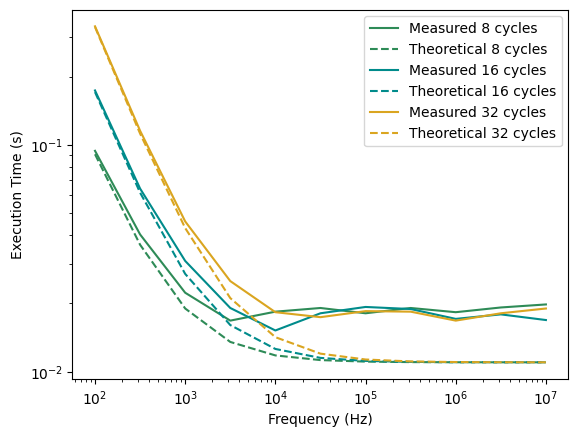

In [5]:
def theoretical_exec_time(freq,n_period,settling_time):
    return((n_period/freq)+ 11*settling_time)

fstart=  100    #100Hz
fstop = 10e6    #10MHz
n_points = 11
freq_l = np.logspace(np.log10(fstart), np.log10(fstop), num = n_points)
settling_time = 0.001
Nperiods_l = [8,16,32]

Nperiods_c = ["seagreen","darkcyan","goldenrod"]

n_ext = 5
plt.figure()
for idx,Nperiods in enumerate(Nperiods_l):
    t_exc_l = []
    t_exc_th = []
    for freq in freq_l:
        ad2.configure_network_analyser(amp = 1.0, offset = 0.0, Nperiods = Nperiods)
        t = timeit.Timer(lambda: ad2.single_frequency_gain_phase(freq, settling_time=settling_time))  
        t_exc = t.timeit(number=n_ext)
        t_exc = round(t_exc/n_ext,4)
        t_exc_l.append(t_exc)
        t_exc_th.append(theoretical_exec_time(freq,Nperiods,settling_time))
    plt.loglog(freq_l,t_exc_l,label = f'Measured {Nperiods} cycles',color = Nperiods_c[idx])
    plt.loglog(freq_l,t_exc_th,label = f'Theoretical {Nperiods} cycles',ls = '--',color = Nperiods_c[idx])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.show()

## Idem but with the settling time set to 0s, 0.001s, and to 0.01s.

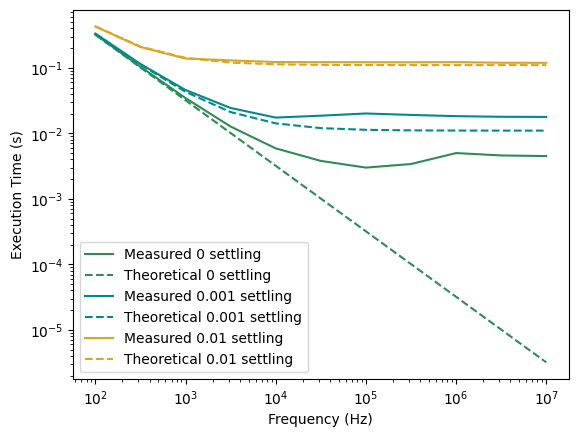

In [6]:
settling_time_l = [0,0.001,0.01]
Nperiod = 16

settling_time_c = ["seagreen","darkcyan","goldenrod"]

n_ext = 5
plt.figure()
for idx,settling_time in enumerate(settling_time_l):
    t_exc_l = []
    t_exc_th = []
    for freq in freq_l:
        ad2.configure_network_analyser(amp = 1.0, offset = 0.0, Nperiods = Nperiods)
        t = timeit.Timer(lambda: ad2.single_frequency_gain_phase(freq, settling_time=settling_time))  
        t_exc = t.timeit(number=n_ext)
        t_exc = round(t_exc/n_ext,4)
        t_exc_l.append(t_exc)
        t_exc_th.append(theoretical_exec_time(freq,Nperiods,settling_time))
    plt.loglog(freq_l,t_exc_l,label = f'Measured {settling_time} settling',color = settling_time_c[idx])
    plt.loglog(freq_l,t_exc_th,label = f'Theoretical {settling_time} settling',ls = '--',color = settling_time_c[idx])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.show()

## Benchmarks with a custom single-frequency method

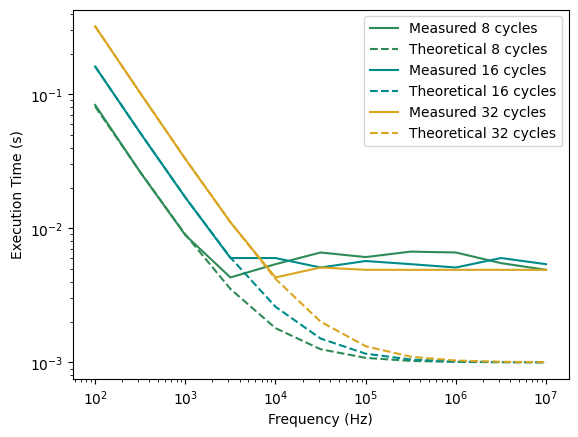

In [10]:
from time import sleep


def theoretical_exec_time_fast(freq,n_period,settling_time):
    return((n_period/freq)+ settling_time)

def conf_single_frequency_fast(ad2,frequency,settling_time,Nperiods,amp = 1.0,offset = 0):
    ad2.configure_network_analyser(amp,offset,Nperiods)
    ad2.set_analyser_frequency(frequency)
    sleep(settling_time)
    
def single_frequency_fast(ad2,settling_time): 
        if (settling_time):
            sleep(settling_time)
        ad2.analyzer_ignore_last_value() # ignore last capture
        while True:
            status = ad2.get_analyser_status()
            if status == 2: 	# same comment as above...
                break
        gain1, phase1 = ad2.get_analyser_raw_input(0)
        gain, phase = ad2.get_analyser_raw_input(1)
        return gain, phase, gain1

fstart=  100    #100Hz
fstop = 10e6    #10MHz
n_points = 11
freq_l = np.logspace(np.log10(fstart), np.log10(fstop), num = n_points)
settling_time = 0.001
Nperiods_l = [8,16,32]

Nperiods_c = ["seagreen","darkcyan","goldenrod"]

n_ext = 5
plt.figure()
for idx,Nperiods in enumerate(Nperiods_l):
    t_exc_l = []
    t_exc_th = []
    for freq in freq_l:
        conf_single_frequency_fast(ad2,freq,settling_time =settling_time,  Nperiods = Nperiods)
        t = timeit.Timer(lambda: single_frequency_fast(ad2,settling_time))  
        t_exc = t.timeit(number=n_ext)
        t_exc = round(t_exc/n_ext,4)
        t_exc_l.append(t_exc)
        t_exc_th.append(theoretical_exec_time_fast(freq,Nperiods,settling_time))
    plt.loglog(freq_l,t_exc_l,label = f'Measured {Nperiods} cycles',color = Nperiods_c[idx])
    plt.loglog(freq_l,t_exc_th,label = f'Theoretical {Nperiods} cycles',ls = '--',color = Nperiods_c[idx])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.show()

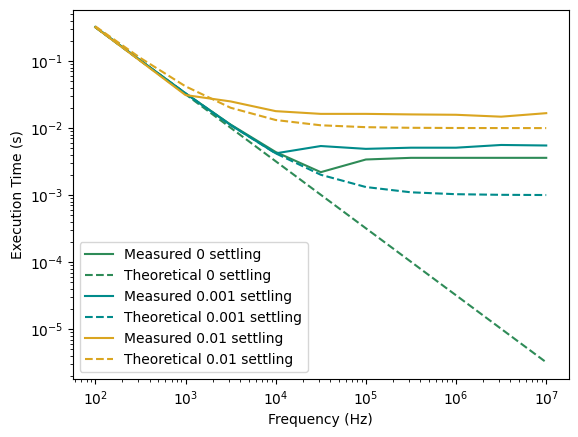

In [ ]:
settling_time_l = [0,0.001,0.01]
Nperiod = 16

settling_time_c = ["seagreen","darkcyan","goldenrod"]

n_ext = 5
plt.figure()
for idx,settling_time in enumerate(settling_time_l):
    t_exc_l = []
    t_exc_th = []
    for freq in freq_l:
        conf_single_frequency_fast(ad2,freq,settling_time =settling_time,  Nperiods = Nperiods)
        t = timeit.Timer(lambda: single_frequency_fast(ad2,settling_time))  
        t_exc = t.timeit(number=n_ext)
        t_exc = round(t_exc/n_ext,4)
        t_exc_l.append(t_exc)
        t_exc_th.append(theoretical_exec_time_fast(freq,Nperiods,settling_time))
    plt.loglog(freq_l,t_exc_l,label = f'Measured {settling_time} settling',color = settling_time_c[idx])
    plt.loglog(freq_l,t_exc_th,label = f'Theoretical {settling_time} settling',ls = '--',color = settling_time_c[idx])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.show()